In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
x_train = np.random.random((1000,12))
y_train = np.random.randint(10, size=(1000,))
x_test = np.random.random((100,12))
y_test = np.random.randint(10, size=(100,))

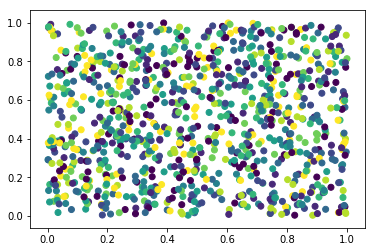

In [33]:
plot_x = x_train[:,0]
plot_y = x_train[:,1]
plt.scatter(plot_x, plot_y, c=y_train)
plt.show()

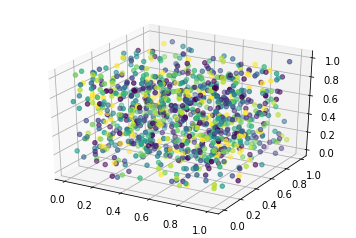

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_z = x_train[:,2]
ax.scatter(plot_x, plot_y, plot_z, c=y_train)
plt.show()

In [81]:
from keras.utils import to_categorical
y_train = np.random.randint(10, size=(1000,))
y_test = np.random.randint(10, size=(100,))
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [82]:
from keras.models import Sequential
from keras.layers import Dense

In [94]:
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 5,642
Trainable params: 5,642
Non-trainable params: 0
_________________________________________________________________


In [95]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1000/1000 [==============================] - 0s 224us/step - loss: 2.3177 - acc: 0.0920
Epoch 2/100
1000/1000 [==============================] - 0s 26us/step - loss: 2.2962 - acc: 0.1270
Epoch 3/100
1000/1000 [==============================] - 0s 27us/step - loss: 2.2896 - acc: 0.1510
Epoch 4/100
1000/1000 [==============================] - 0s 25us/step - loss: 2.2853 - acc: 0.1480
Epoch 5/100
1000/1000 [==============================] - 0s 26us/step - loss: 2.2798 - acc: 0.1580
Epoch 6/100
1000/1000 [==============================] - 0s 28us/step - loss: 2.2765 - acc: 0.1500
Epoch 7/100
1000/1000 [==============================] - 0s 27us/step - loss: 2.2732 - acc: 0.1680
Epoch 8/100
1000/1000 [==============================] - 0s 27us/step - loss: 2.2680 - acc: 0.1570
Epoch 9/100
1000/1000 [==============================] - 0s 27us/step - loss: 2.2649 - acc: 0.1720
Epoch 10/100
1000/1000 [==============================] - 0s 29us/step - loss: 2.2621 - acc: 0.1700
Epoch 11

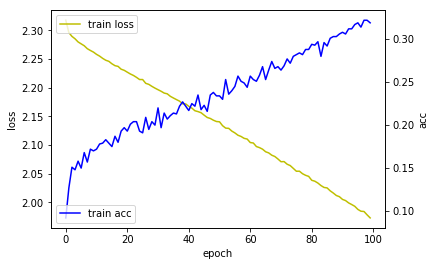

In [96]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [97]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

100/100 [==============================] - 0s 1ms/step


[2.4915150928497316, 0.03]

In [130]:
np.argmax(model.predict(x_test), axis=1)

array([3, 9, 0, 0, 0, 3, 5, 5, 3, 9, 8, 8, 3, 0, 5, 9, 7, 9, 3, 8, 6, 1,
       1, 3, 2, 5, 1, 3, 7, 2, 7, 4, 3, 9, 9, 2, 4, 1, 1, 7, 9, 3, 1, 9,
       3, 3, 5, 7, 4, 8, 6, 6, 3, 7, 3, 4, 2, 2, 7, 7, 4, 1, 4, 9, 3, 0,
       7, 2, 0, 5, 4, 3, 1, 0, 2, 2, 2, 2, 1, 8, 9, 4, 6, 5, 8, 1, 5, 0,
       9, 9, 6, 3, 7, 1, 2, 9, 8, 3, 2, 3], dtype=int64)